In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import sys
import numpy
import matplotlib.pyplot as plt
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime

In [3]:
roe=pd.read_excel('ROE calculations.xlsx')

In [4]:
roe = roe.dropna()
roe

,Company,Year,Net income,Revenue,Net profit margin,Avg total assets,Asset turnover,Avg Shareholder equity,Equity Multiplier,ROE
0,Adani Green energy,2016.0,-8.934000e+01,5.000000e-02,-1786.800000,2.760168e+04,0.000002,1.590166e+04,1.735773,-0.561828
1,Adani Green energy,2017.0,-4.930240e+03,1.775100e+03,-2.777444,1.028506e+05,0.017259,6.914286e+04,1.487509,-7.130512
2,Adani Green energy,2018.0,-2.868070e+03,1.559045e+04,-0.183963,2.999585e+05,0.051975,1.260833e+05,2.379050,-2.274742
3,Adani Green energy,2019.0,-3.509040e+03,6.207733e+04,-0.056527,5.369245e+05,0.115616,1.800932e+05,2.981370,-1.948458
5,NLC,2015.0,1.579680e+03,6.087680e+03,0.259488,2.090370e+04,0.291225,1.325018e+04,1.577616,11.921951
6,NLC,2016.0,1.204150e+03,6.669050e+03,0.180558,2.251646e+04,0.296186,1.292550e+04,1.742018,9.316081
7,NLC,2017.0,2.342200e+03,8.672840e+03,0.270061,2.559829e+04,0.338805,1.219863e+04,2.098457,19.200517
8,NLC,2018.0,1.909810e+03,8.496200e+03,0.224784,3.250641e+04,0.261370,1.333458e+04,2.437753,14.322236
9,NLC,2019.0,1.232770e+03,7.145920e+03,0.172514,3.468234e+04,0.206039,1.251133e+04,2.772075,9.853229
11,NTPC,2015.0,1.029086e+04,7.390658e+04,0.139241,1.971347e+05,0.374904,8.383010e+04,2.351598,12.275853


In [6]:
roe['Year'] = pd.to_datetime(roe['Year'].astype(int), format='%Y')

In [7]:
subset= roe[['Company','Year','ROE']]

In [8]:
subset2=subset.dropna()
subset2

,Company,Year,ROE
0,Adani Green energy,2016-01-01,-0.561828
1,Adani Green energy,2017-01-01,-7.130512
2,Adani Green energy,2018-01-01,-2.274742
3,Adani Green energy,2019-01-01,-1.948458
5,NLC,2015-01-01,11.921951
6,NLC,2016-01-01,9.316081
7,NLC,2017-01-01,19.200517
8,NLC,2018-01-01,14.322236
9,NLC,2019-01-01,9.853229
11,NTPC,2015-01-01,12.275853


In [9]:
subset_new=subset.groupby(subset['Company'])

In [10]:
subset_new

In [11]:
subset_z=subset2
subset_z['roe_p']=(subset2['ROE']/ subset['ROE'].shift(1))-1
subset_z2=subset_z
subset_z2.dropna()

,Company,Year,ROE,roe_p
1,Adani Green energy,2017-01-01,-7.130512,11.691625
2,Adani Green energy,2018-01-01,-2.274742,-0.680985
3,Adani Green energy,2019-01-01,-1.948458,-0.143438
5,NLC,2015-01-01,11.921951,-7.118661
6,NLC,2016-01-01,9.316081,-0.218578
7,NLC,2017-01-01,19.200517,1.061008
8,NLC,2018-01-01,14.322236,-0.254070
9,NLC,2019-01-01,9.853229,-0.312033
11,NTPC,2015-01-01,12.275853,0.245871
12,NTPC,2016-01-01,11.219734,-0.086032


In [12]:
subset_group = subset2['ROE'].groupby(subset2['Company'])

In [13]:
subset_group2=subset_z2.groupby(subset_z2['Company'])

In [14]:
subset_z2

,Company,Year,ROE,roe_p
0,Adani Green energy,2016-01-01,-0.561828,NaN
1,Adani Green energy,2017-01-01,-7.130512,11.691625
2,Adani Green energy,2018-01-01,-2.274742,-0.680985
3,Adani Green energy,2019-01-01,-1.948458,-0.143438
5,NLC,2015-01-01,11.921951,-7.118661
6,NLC,2016-01-01,9.316081,-0.218578
7,NLC,2017-01-01,19.200517,1.061008
8,NLC,2018-01-01,14.322236,-0.254070
9,NLC,2019-01-01,9.853229,-0.312033
11,NTPC,2015-01-01,12.275853,0.245871


In [15]:
df_z=subset_group2.std()

In [16]:
df_z

,ROE,roe_p
Company,,
Adani Green energy,2.865645,6.993320
Azure power,14.259737,0.559933
Greenko Energy,9.656917,3.518654
Inox wind,18.604045,12.088768
Mytrah energy,5.870633,52.821191
NLC,4.024939,3.265243
NTPC,1.044569,0.153503
Renew power,0.204759,0.533386
Sembcorp green infra limited,1.558901,3.652935


In [17]:
df_z2=df_z['roe_p']
subset_cluster = df_z2.as_matrix()
subset_cluster
# subset_cluster = df_z.as_matrix()

C:\Users\rachit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([ 6.99332002,  0.55993315,  3.51865351, 12.08876847, 52.82119105,
        3.26524326,  0.15350321,  0.53338609,  3.65293546, 14.14985002,
        7.44044543,  1.3334198 ,  0.56692476,  1.19034737])

In [18]:
subset_cluster_2=subset_cluster.reshape(-1,1)

In [19]:
subset_cluster_2

array([[ 6.99332002],
       [ 0.55993315],
       [ 3.51865351],
       [12.08876847],
       [52.82119105],
       [ 3.26524326],
       [ 0.15350321],
       [ 0.53338609],
       [ 3.65293546],
       [14.14985002],
       [ 7.44044543],
       [ 1.3334198 ],
       [ 0.56692476],
       [ 1.19034737]])

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(subset_cluster_2)

In [21]:
kmeans.cluster_centers_

array([[ 1.64159407],
       [52.82119105],
       [13.11930924],
       [ 7.21688273]])

In [22]:
filepath = 'sop_clusters2.xlsx'
df_z.to_excel(filepath, index=False)

In [23]:
df_z['Clusters']=kmeans.labels_

In [24]:
filepath = 'sop_clusters2.xlsx'
df_z.to_excel(filepath)

In [25]:
df_z

,ROE,roe_p,Clusters
Company,,,
Adani Green energy,2.865645,6.993320,3
Azure power,14.259737,0.559933,0
Greenko Energy,9.656917,3.518654,0
Inox wind,18.604045,12.088768,2
Mytrah energy,5.870633,52.821191,1
NLC,4.024939,3.265243,0
NTPC,1.044569,0.153503,0
Renew power,0.204759,0.533386,0
Sembcorp green infra limited,1.558901,3.652935,0


In [27]:
# subset_group3=df_z.groupby(df_z['Clusters'])

In [28]:
# subset_group3

In [26]:
df_z.reset_index(level='Company', inplace=True)      

In [27]:
df_z

,Company,ROE,roe_p,Clusters
0,Adani Green energy,2.865645,6.993320,3
1,Azure power,14.259737,0.559933,0
2,Greenko Energy,9.656917,3.518654,0
3,Inox wind,18.604045,12.088768,2
4,Mytrah energy,5.870633,52.821191,1
5,NLC,4.024939,3.265243,0
6,NTPC,1.044569,0.153503,0
7,Renew power,0.204759,0.533386,0
8,Sembcorp green infra limited,1.558901,3.652935,0
9,Suzlon energy,247.126788,14.149850,2


In [28]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==0):
        print(company)

Azure power
Greenko Energy 
NLC
NTPC
Renew power
Sembcorp green infra limited
Tata power renewables
Torrent power
Welspun group


In [29]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==1):
        print(company)

Mytrah energy


In [30]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==2):
        print(company)

Inox wind
Suzlon energy


In [31]:
for cluster,company in zip(df_z.Clusters, df_z.Company):
    if (cluster==3):
        print(company)

Adani Green energy
Tata Green energy limited


In [35]:
# for cluster,company in zip(df_z.Clusters, df_z.Company):
#     if (cluster==4):
#         print(company)

In [32]:
subset3=subset2
# subset3.set_index('Company',inplace=True)
# subset4=subset3.drop(subset3.index[[33]])
# subset3['Year'] = pd.to_datetime(subset3['Year'])
subset3.set_index('Company',inplace=True)
subset3.dropna()

,Year,ROE,roe_p
Company,,,
Adani Green energy,2017-01-01,-7.130512,11.691625
Adani Green energy,2018-01-01,-2.274742,-0.680985
Adani Green energy,2019-01-01,-1.948458,-0.143438
NLC,2015-01-01,11.921951,-7.118661
NLC,2016-01-01,9.316081,-0.218578
NLC,2017-01-01,19.200517,1.061008
NLC,2018-01-01,14.322236,-0.254070
NLC,2019-01-01,9.853229,-0.312033
NTPC,2015-01-01,12.275853,0.245871


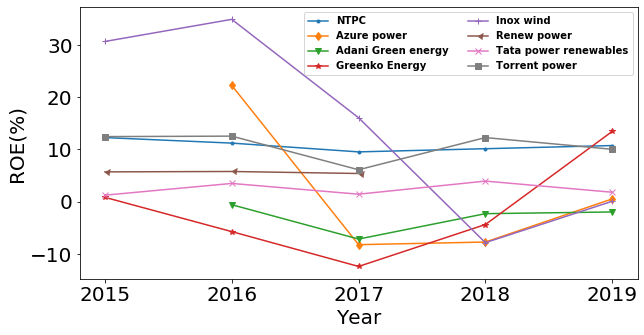

In [116]:

plt.figure(figsize=(10,5))
plt.plot(subset3.loc['NTPC']['Year'].dt.strftime('%Y'), subset3.loc['NTPC']['ROE'], label='NTPC', marker=".",alpha=1)
plt.plot(subset3.loc['Azure power']['Year'].dt.strftime('%Y'), subset3.loc['Azure power']['ROE'], label='Azure power', marker="d",alpha=1)
plt.plot(subset3.loc['Adani Green energy']['Year'].dt.strftime('%Y'), subset3.loc['Adani Green energy']['ROE'], label='Adani Green energy',alpha=1, marker="v")
plt.plot(subset3.iloc[33:38]['Year'].dt.strftime('%Y'), subset3.iloc[33:38]['ROE'], label='Greenko Energy',marker="*",alpha=1)

plt.plot(subset3.loc['Inox wind']['Year'].dt.strftime('%Y'), subset3.loc['Inox wind']['ROE'], label='Inox wind',marker="+",alpha=1)
plt.plot(subset3.loc['Renew power']['Year'].dt.strftime('%Y'), subset3.loc['Renew power']['ROE'], label='Renew power',marker=4,alpha=1)
plt.plot(subset3.loc['Tata power renewables']['Year'].dt.strftime('%Y'), subset3.loc['Tata power renewables']['ROE'], alpha=1,label='Tata power renewables',marker="x")
plt.plot(subset3.loc['Torrent power']['Year'].dt.strftime('%Y'), subset3.loc['Torrent power']['ROE'], label='Torrent power',alpha=1,marker="s")

plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(loc=1,prop={'size': 10,'weight':'bold'}, ncol=2)
plt.savefig('cluster-1.jpeg')

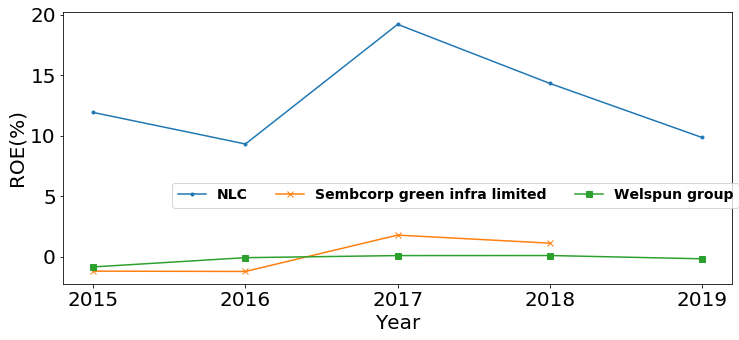

In [139]:
# ax = plt.gca()
plt.figure(figsize=(12,5))
# plt.plot(subset3.loc['Suzlon energy']['Year'], subset3.loc['Suzlon energy']['ROE'], label='Suzlon energy')
plt.plot(subset3.loc['NLC']['Year'].dt.strftime('%Y'), subset3.loc['NLC']['ROE'], label='NLC',marker=".")
plt.plot(subset3.loc['Sembcorp green infra limited']['Year'].dt.strftime('%Y'), subset3.loc['Sembcorp green infra limited']['ROE'], label='Sembcorp green infra limited',marker="x")
plt.plot(subset3.loc['Welspun group']['Year'].dt.strftime('%Y'), subset3.loc['Welspun group']['ROE'], label='Welspun group',marker="s")

plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 14,'weight':'bold'}, ncol=3,loc="center",bbox_to_anchor=(1.2, .5), bbox_transform=ax.transAxes)
plt.savefig('cluster-2.jpeg')

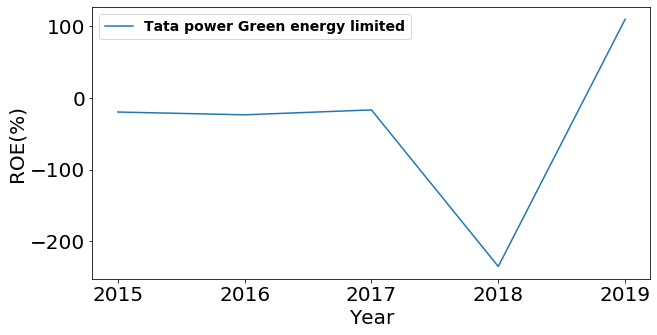

In [113]:
plt.figure(figsize=(10,5))

plt.plot(subset3.iloc[25:30]['Year'].dt.strftime('%Y'), subset3.iloc[25:30]['ROE'], label='Tata power Green energy limited')

plt.xlabel('Year')
plt.ylabel('ROE(%)')
plt.legend()
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 14,'weight':'bold'})
plt.savefig('Tata Green.jpeg')

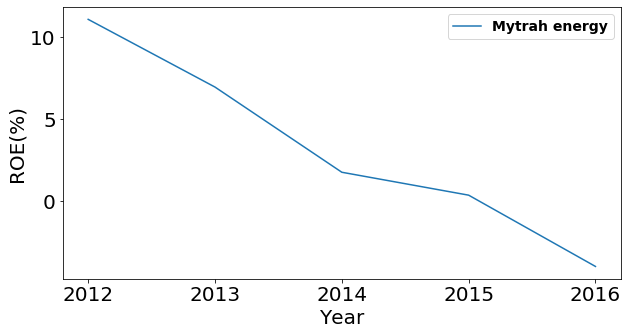

In [115]:
plt.figure(figsize=(10,5))
plt.plot(subset3.loc['Mytrah energy']['Year'].dt.strftime('%Y'), subset3.loc['Mytrah energy']['ROE'], label='Mytrah energy')

plt.ylabel('ROE(%)')
plt.xlabel('Year')
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 14,'weight':'bold'})
plt.savefig("Mytrah.jpeg")

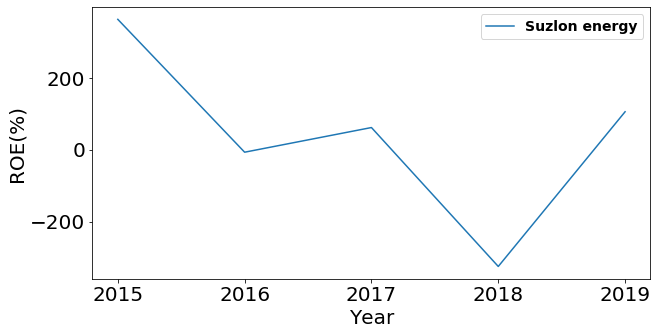

In [114]:
plt.figure(figsize=(10,5))

plt.plot(subset3.loc['Suzlon energy']['Year'].dt.strftime('%Y'), subset3.loc['Suzlon energy']['ROE'], label='Suzlon energy')

plt.xlabel('Year')
plt.ylabel('ROE(%)')
plt.legend()
plt.rcParams["font.size"] = "20"
plt.legend(prop={'size': 14,'weight':'bold'})
plt.savefig('Suzlon.jpeg')

In [95]:
plt.plot(subset3.loc['Greenko Energy']['Year'], subset3.loc['Greenko Energy']['ROE'], label='Greenko Energy')


KeyError: 'the label [Greenko Energy] is not in the [index]'